In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import ast

In [4]:

plt.style.use('ggplot')

def histCurve(data, title, lol=[["GAN","darkred"], ["CNN","#091540"]]):
  plt.figure(num=None, figsize=(10, 5), dpi=96, facecolor='w', edgecolor='k')
  for x, col in zip(data, lol):
    bin_heights, bin_borders = np.histogram(x, bins='auto')
    bin_widths = np.diff(bin_borders)
    bin_centers = bin_borders[:-1] + bin_widths / 2
    t_init = models.Gaussian1D()
    fit_t = fitting.LevMarLSQFitter()
    t = fit_t(t_init, bin_centers, bin_heights)
    x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
    plt.title(f"{title}")
    xlab = title.split(" ")[-1]
    plt.xlabel(f"{xlab}")
    plt.ylabel(f"Frequency")
    plt.bar(bin_centers, bin_heights, width=bin_widths, label=col[0])
    plt.plot(x_interval_for_fit, t(x_interval_for_fit), label=col[0], c=col[1])
    plt.legend()
  #print(np.mean(data, axis=1))
"""            'TP': tps.cpu(),
            'FP': fps.cpu(),
            'TN': tns.cpu(),
            'FN': fns.cpu(),
            'SUP': sups.cpu()
"""
CNN = [[float(x[0]), float(x[1]), ast.literal_eval(x[2])] for x in np.genfromtxt("/content/GAN-CNN-C3.log", delimiter="|", dtype=str)]
GAN = [[float(x[0]), float(x[1]), ast.literal_eval(x[2])] for x in np.genfromtxt("/content/GAN-CNN-C3.log", delimiter="|", dtype=str)]
#CNN = CNN[:len(GAN)]
print(len(CNN), len(GAN))

def metrics(data):
  mets = []
  for acc, loss, stats in data:
    met_c = []
    for c in stats:
      tp, fp, tn, fn = c[0], c[1], c[2], c[3]

      sen = tp/(tp+fn)
      spe = tn/(tn+fp)
      #acc = (tn+tp)/(tp+fp+tn+fn)
      met_c.append(sen)
      met_c.append(spe)
      met_c.append(acc)
      
    mets.append(met_c)
  
  return np.array(mets)

GAN_m = metrics(GAN)
CNN_m = metrics(CNN)

print(GAN_m[1])

81 81
[0.95522388 1.         0.98124999 1.         0.95522388 0.98124999]


In [5]:
f = open("GAN.csv", "a")

for ln in GAN_m:
  f.write(f"{ln[0]},{ln[1]},{ln[2]}\n")
f.close()
print(ln)

[0.72307692 1.         0.86041671 1.         0.72307692 0.86041671]


'\nfor i in range(6):\n  histCurve([GAN_m[:,i], CNN_m[:,i]], ["normal sen", "normal spe", "normal acc", "abnormal sen", "abnormal spe", "abnormal acc"][i])\n'

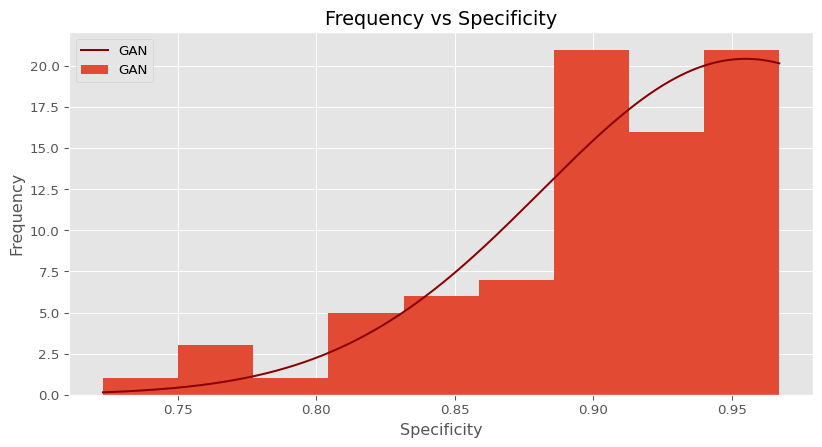

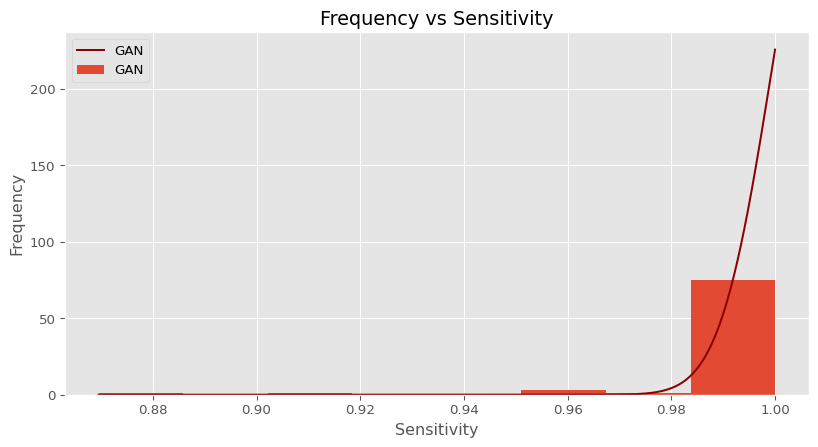

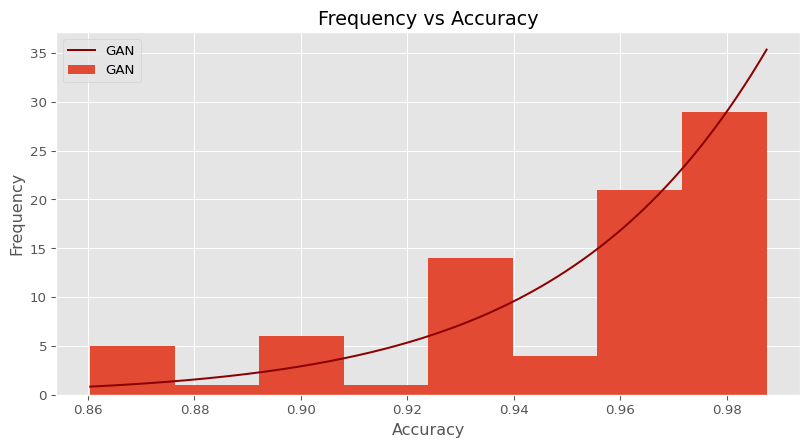

In [6]:
for i in range(3):
  histCurve([GAN_m[:,i]], ["Frequency vs Specificity", "Frequency vs Sensitivity", "Frequency vs Accuracy", "abnormal sen", "abnormal spe", "abnormal acc"][i])
'''
for i in range(6):
  histCurve([GAN_m[:,i], CNN_m[:,i]], ["normal sen", "normal spe", "normal acc", "abnormal sen", "abnormal spe", "abnormal acc"][i])
'''

[68, 6, 59, 0]
[[68  6]
 [ 0 59]]


NameError: ignored

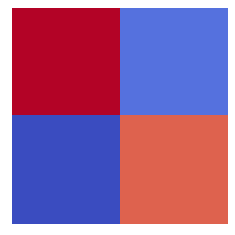

In [7]:
GAN = [[float(x[0]), float(x[1]), ast.literal_eval(x[2])] for x in np.genfromtxt("/content/GAN-CNN-C3.log", delimiter="|", dtype=str)]
"""            'TP': tps.cpu(),
            'FP': fps.cpu(),
            'TN': tns.cpu(),
            'FN': fns.cpu(),
            'SUP': sups.cpu()
"""
abnormal_stats = np.array([ab_stat for _,_, [_,ab_stat] in GAN])
confusion = []
for i in range(len(abnormal_stats[0])-1):
  confusion.append(int(np.mean(abnormal_stats[:,i])))
print(confusion)

confusion = np.reshape(confusion, (2,2))
confusion[1] = np.array([confusion[1][1], confusion[1][0]])
print(confusion)

plt.imshow(confusion, cmap="coolwarm",extent=[0,4,0,4])
plt.grid(False)
plt.ylim(0,4)
plt.xlim(0,4)
plt.xticks([])
plt.yticks([])

for z, y in enumerate([1, 3]):
  for g, x in enumerate([1, 3]):
    rate = round(confusion[z][g]/total[z], 2)
    plt.text(x, y, f"{confusion[z][g]}\n({rate})", color='black', ha='center', va='center')

plt.show()

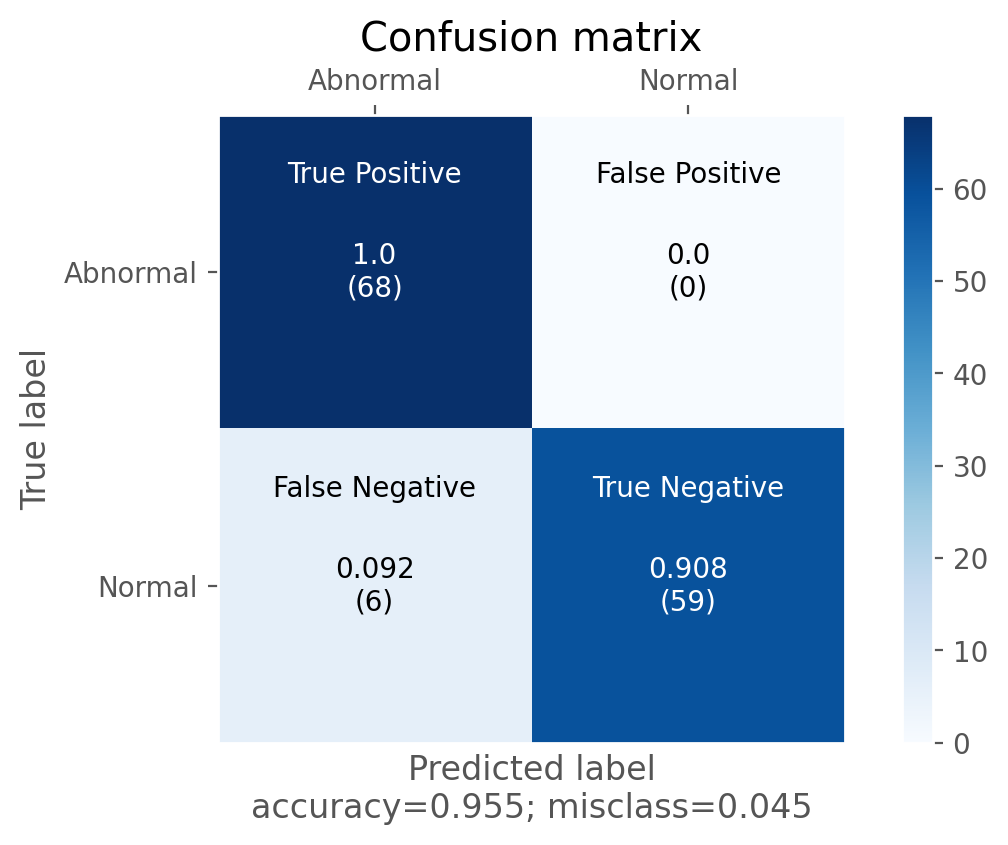

In [91]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    ratios = cm
    labels = [["True Positive", "False Positive"], ["False Negative", "True Negative"]]

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4), dpi=200)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
        plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False

        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, f"{round(cm[i, j], 3)}\n({ratios[i, j]})",
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            plt.text(j, i, f"{labels[i][j]}\n \n \n \n \n\n",
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, f"{labels[i][j]}:\n{round(cm[i, j], 3)}\n({ratios[i, j]})",
                     horizontalalignment="center",
                     verticalalignment="baseline",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))
    plt.show()
  
plot_confusion_matrix(cm=np.array(confusion).T, normalize=True,target_names =["Abnormal", "Normal"])

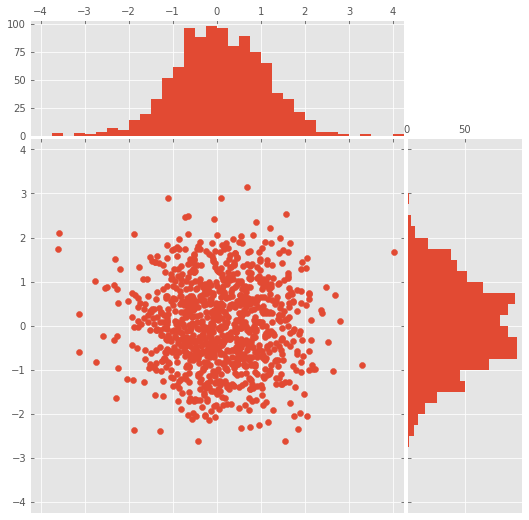

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()